In [1]:
import numpy as np 
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc

# Models
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import string
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_all = pd.read_csv('https://gitlab.oit.duke.edu/wz151/cs216-project/-/raw/main/Dataset/titanic.csv')

In [3]:
df_all

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [4]:
df_all.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [5]:
df_all.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Missing Value

In [6]:
mean_age_miss = round(df_all[df_all["Name"].str.contains('Miss.', na=False)]['Age'].median())
mean_age_mr = round(df_all[df_all["Name"].str.contains('Mr.', na=False)]['Age'].median())
mean_age_master = round(df_all[df_all["Name"].str.contains('Master.', na=False)]['Age'].median())

In [7]:
def fill_age(name_age):
    
    name = name_age[0]
    age = name_age[1]
    if pd.isnull(age):
        if 'Mr.' in name:
            return mean_age_mr
        if 'Mrs.' in name:
            return mean_age_mr
        if 'Miss.' in name:
            return mean_age_miss
        if 'Master.' in name:
            return mean_age_master
        if 'Dr.' in name:
            return mean_age_master
        if 'Ms.' in name:
            return mean_age_miss
    else:
        return age
    
df_all['Age'] = df_all[['Name', 'Age']].apply(fill_age,axis=1)

In [8]:
df_all = df_all.drop(['Cabin'], axis=1)
df_all = df_all.dropna()

In [9]:
df_all.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Visualization

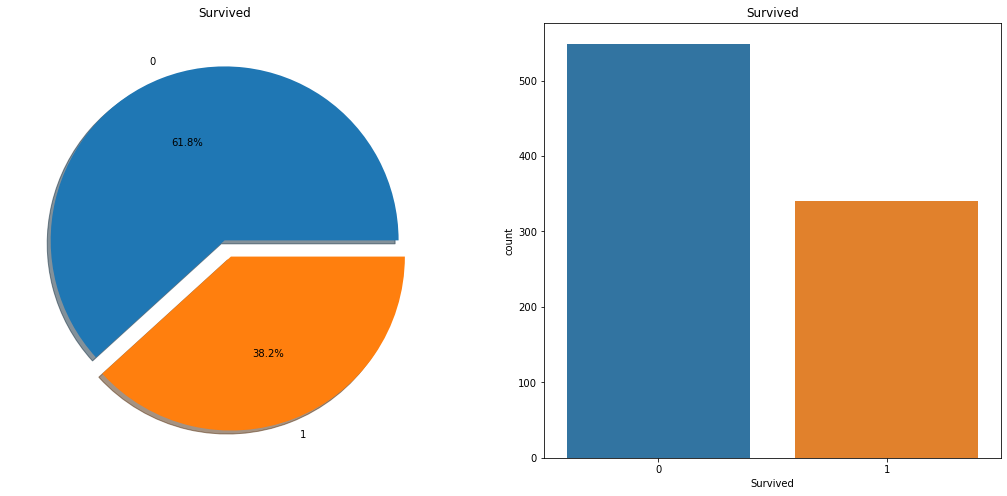

In [10]:
#Number of survivors
f,ax=plt.subplots(1,2,figsize=(18,8)) 
#Pie Chart
df_all['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived') 
ax[0].set_ylabel('')
#Histogram
sns.countplot(x='Survived',data=df_all,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='count'>

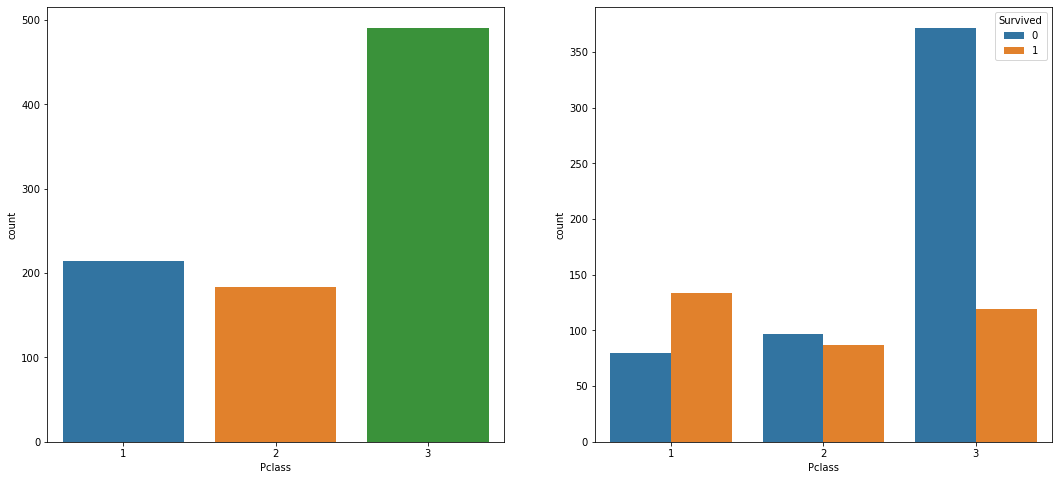

In [11]:
#Number of people in each class and the survived numbers
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot(data=df_all,x="Pclass",ax=ax[0])
sns.countplot(data=df_all,x="Pclass",hue='Survived',ax=ax[1])

<AxesSubplot:xlabel='Age', ylabel='Fare'>

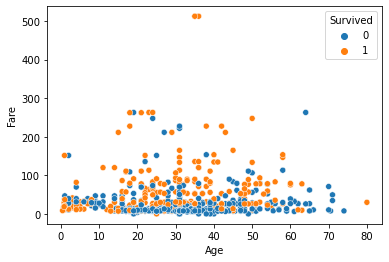

In [12]:
#Age and fare distribution
sns.scatterplot(data=df_all, x='Age', y='Fare', hue='Survived')

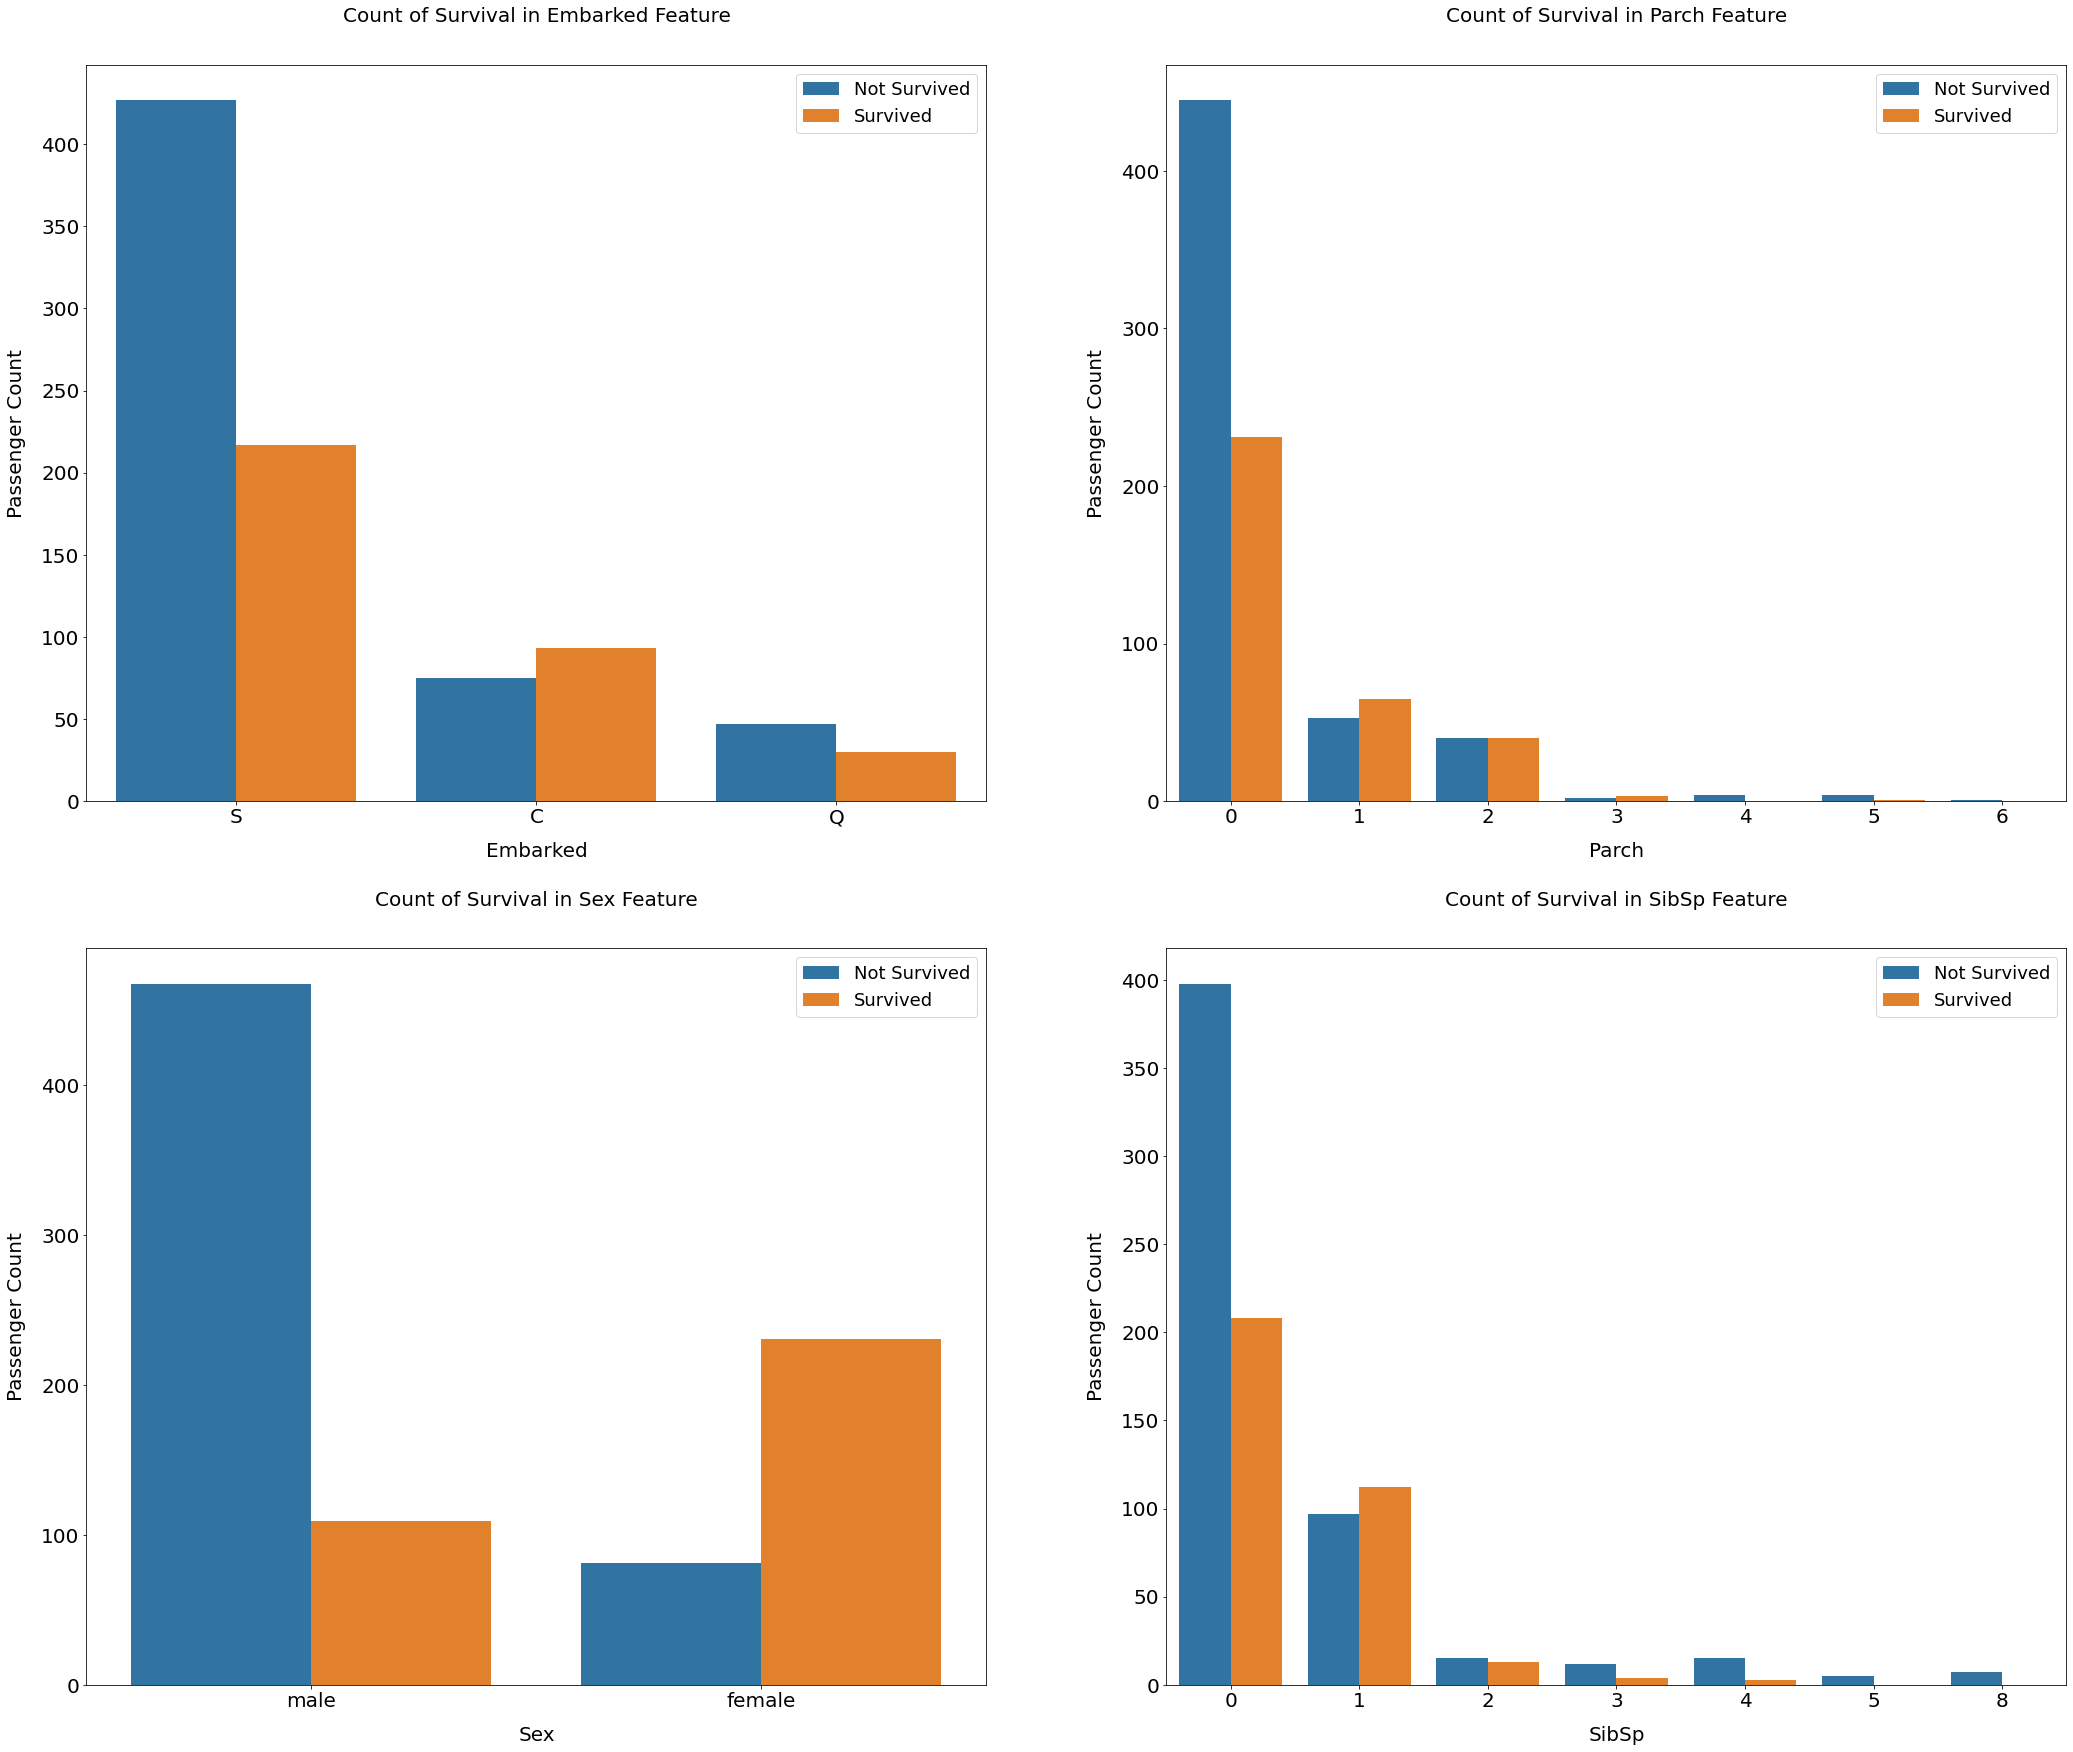

In [13]:
#Survival under each categorical features
cat_features = ['Embarked', 'Parch', 'Sex', 'SibSp']

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):    
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, hue='Survived', data=df_all)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 18})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

In [14]:
#Survival under each continuous features
df_all['Fare1'] = pd.qcut(df_all['Fare'], 13)
df_all['Age1'] = pd.qcut(df_all['Age'], 10)

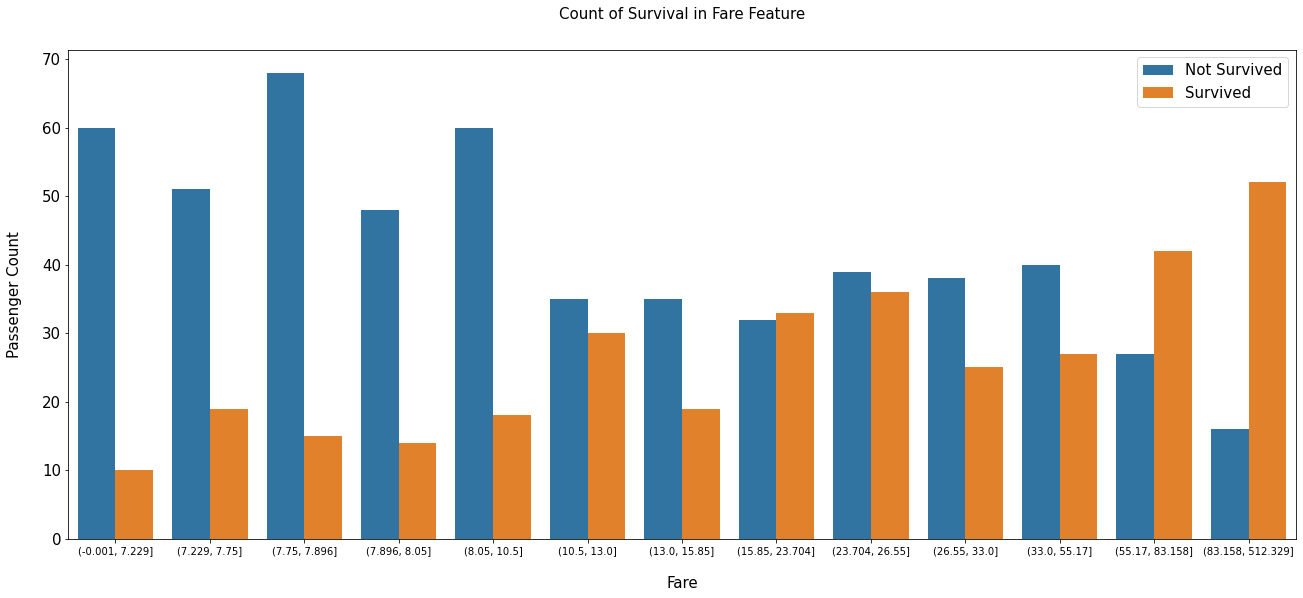

In [15]:
#Survival under each continuous features
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare1', hue='Survived', data=df_all)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()

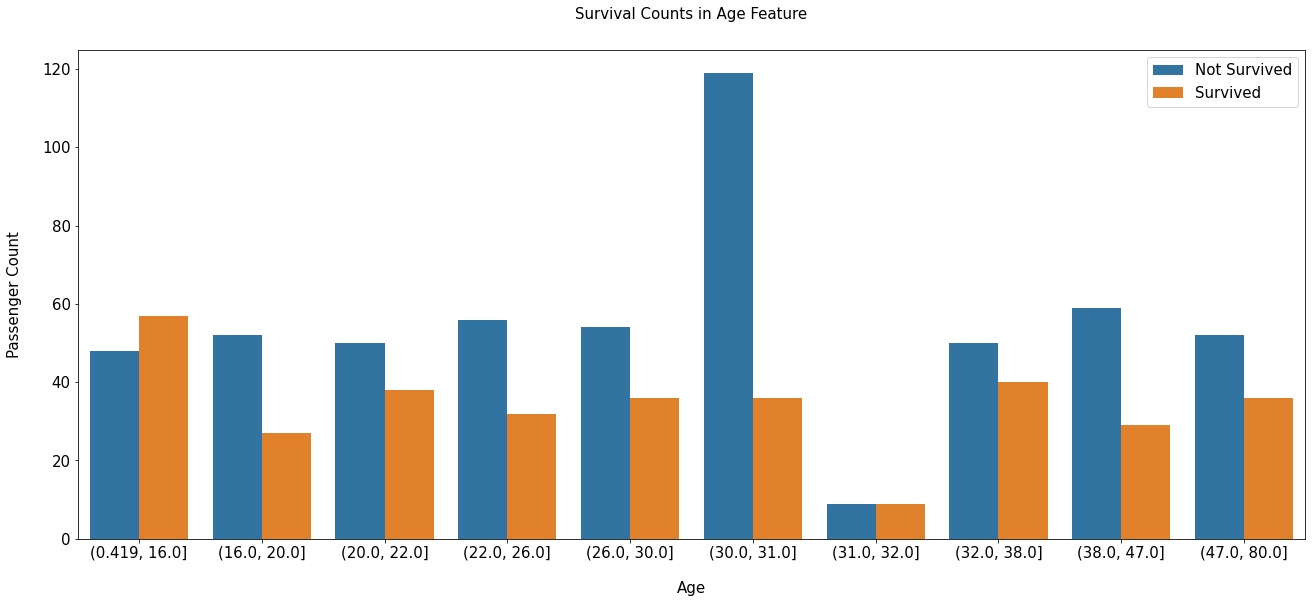

In [16]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Age1', hue='Survived', data=df_all)

plt.xlabel('Age', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survival Counts in {} Feature'.format('Age'), size=15, y=1.05)

plt.show()

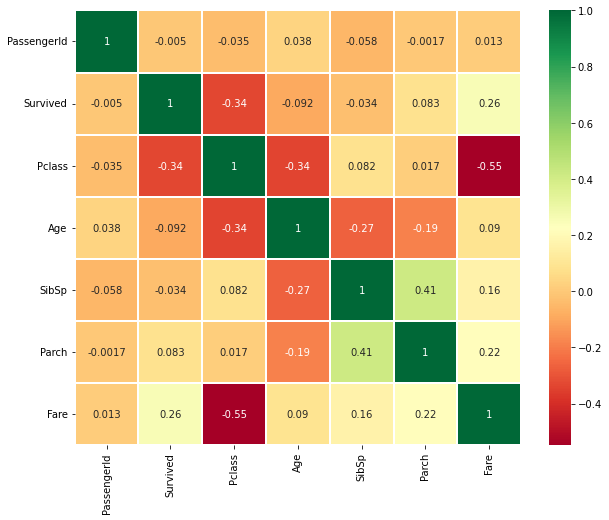

In [17]:
sns.heatmap(df_all.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# Prediction Model

In [18]:
#Train/Test sets
df_train, df_test = train_test_split(df_all, test_size=0.3, random_state=42)
X_train=np.append(OneHotEncoder().fit_transform(df_train[["Pclass","Sex"]].values).toarray(),
                    df_train[["Fare",'Parch']],axis=1)
X_test=np.append(OneHotEncoder().fit_transform(df_test[["Pclass","Sex"]].values).toarray(),
                    df_test[["Fare",'Parch']],axis=1)
y_train=df_train["Survived"]
y_test=df_test['Survived']

In [19]:
#KNN
trial={'n_neighbors':range(1,30)}
K_nn=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=trial)
K_nn.fit(X_train,y_train)
print("number of k:"+str(K_nn.best_params_["n_neighbors"]))
print("score:%f"%K_nn.score(X_train,y_train))
print("accuracy:%f"%accuracy_score(y_test,K_nn.predict(X_test)))
knn_ac = accuracy_score(y_test,K_nn.predict(X_test))
knn_cv = cross_val_score(K_nn, X_train, y_train, cv=10)
knn_cv_score = knn_cv.mean()

number of k:1
score:0.922830
accuracy:0.749064


In [20]:
#GaussianNB
gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)
gnb_ac = accuracy_score(y_test,gaussian.predict(X_test))
print("accuracy:%f"%gnb_ac)
gnb_cv = cross_val_score(gaussian, X_train, y_train, cv=10)
gnb_cv_score = gnb_cv.mean()

accuracy:0.782772


In [21]:
#Perceptron
##Create a perceptron object with the parameters max_iter=1000
perceptron = Perceptron(max_iter=1000)
perceptron.fit(X_train,y_train)
per_ac = accuracy_score(y_test,perceptron.predict(X_test))
#Apply the trained perceptron on the X data to make predicts for the y test data
print("accuracy:%f"%per_ac)
per_cv = cross_val_score(perceptron, X_train, y_train, cv=10)
per_cv_score = per_cv.mean()

accuracy:0.745318


In [22]:
#Logistic Regression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
log_ac = accuracy_score(y_test,logreg.predict(X_test))
print("accuracy:%f"%log_ac)
log_cv = cross_val_score(logreg, X_train, y_train, cv=10)
log_cv_score = log_cv.mean()

accuracy:0.794007


In [23]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,y_train)
rf_ac = accuracy_score(y_test,random_forest.predict(X_test))
print("accuracy:%f"%rf_ac)
rf_cv = cross_val_score(random_forest, X_train, y_train, cv=10)
rf_cv_score = rf_cv.mean()

accuracy:0.790262


In [24]:
#Decision Tree
decision_tree = DecisionTreeClassifier(random_state=0) 
decision_tree.fit(X_train, y_train) 
dt_ac = accuracy_score(y_test,decision_tree.predict(X_test))
print("accuracy:%f"%dt_ac)
dt_cv = cross_val_score(decision_tree, X_train, y_train, cv=10)
dt_cv_score = dt_cv.mean()

accuracy:0.812734


In [25]:
results = {'0': ['KNN', 'GaussianNB',"Perceptron", 'Logistic Regression', 'Random Forest', 'Decision Tree'],
          '1':[knn_ac,gnb_ac,per_ac,log_ac,rf_ac,dt_ac],
          '2':[knn_cv_score,gnb_cv_score,per_cv_score,log_cv_score,rf_cv_score,dt_cv_score]
          }
summary = pd.DataFrame.from_dict(results)
summary = summary.transpose()
summary = summary.rename(index = {'0':'model', '1':'accuracy','2':'cross_val_score'})
summary

0           1           2                    3  \
model                 KNN  GaussianNB  Perceptron  Logistic Regression   
accuracy         0.749064    0.782772    0.745318             0.794007   
cross_val_score  0.773349    0.779672    0.724962             0.779698   

                             4              5  
model            Random Forest  Decision Tree  
accuracy              0.790262       0.812734  
cross_val_score       0.819867       0.811905